In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
# Checking size of dataset
df.shape

(200, 5)

In [4]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.duplicated().sum()

0

There are no duplicate and null values in the dataset

In [9]:
# Dropping CustomerID column as it is not relevant for clustering and model prediction
df.drop(columns = ['CustomerID'], inplace = True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [10]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


Female    112
Male       88
Name: Gender, dtype: int64


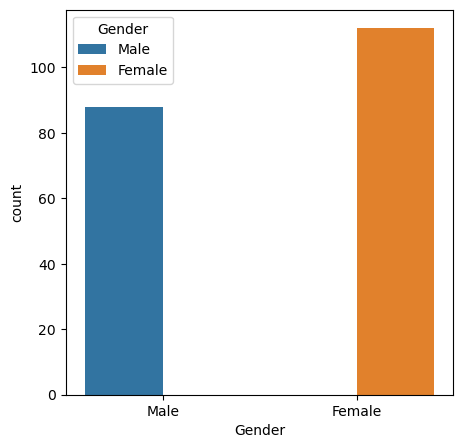

In [11]:
print(df['Gender'].value_counts())
plt.figure(figsize = (5,5))
sns.countplot(x=df['Gender'], hue = df['Gender'])
plt.show()

There are more female customers than male customers.

In [12]:
avg_score = df.groupby('Gender')['Spending Score (1-100)'].mean().reset_index()
avg_score

,Gender,Spending Score (1-100)
0,Female,51.526786
1,Male,48.511364


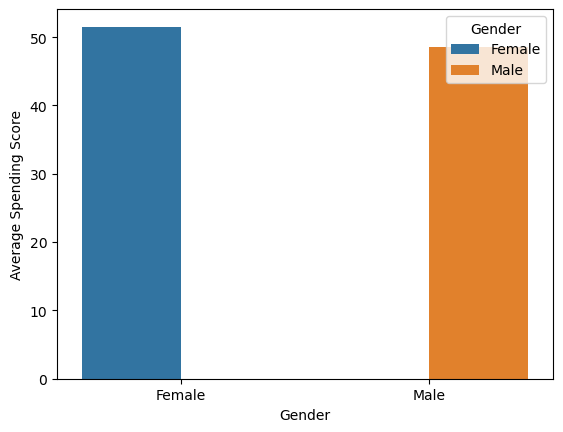

In [13]:
sns.barplot(x = 'Gender', y = 'Spending Score (1-100)', data = avg_score, hue = avg_score['Gender'])
plt.ylabel("Average Spending Score")
plt.show()

In [14]:
total_score = df.groupby('Gender')['Spending Score (1-100)'].sum().reset_index()
total_score

,Gender,Spending Score (1-100)
0,Female,5771
1,Male,4269


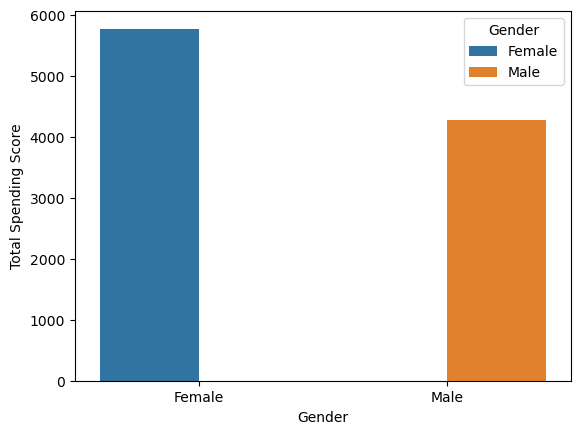

In [15]:
sns.barplot(x = 'Gender', y = 'Spending Score (1-100)', data = total_score, hue = total_score['Gender'])
plt.ylabel("Total Spending Score")
plt.show()

#### Spending score of female customer is greater than spending score of male customers.

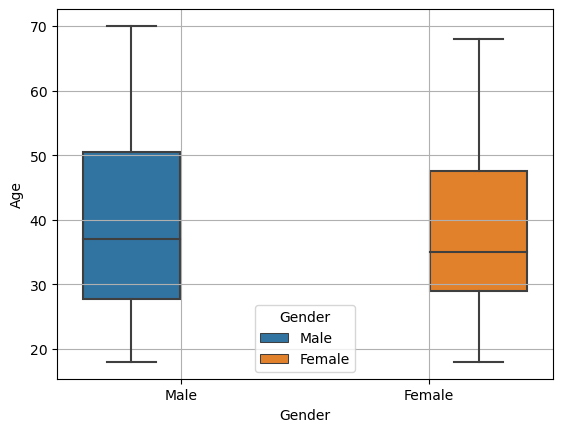

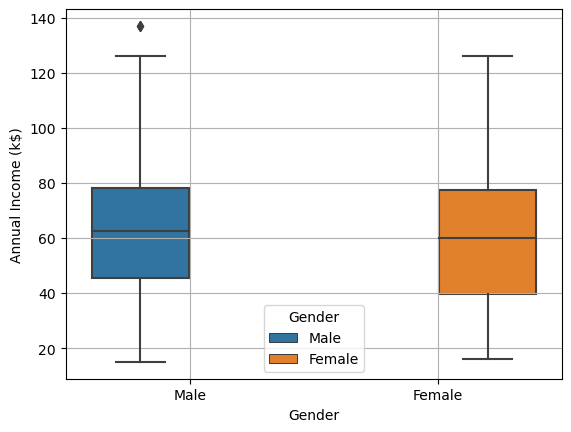

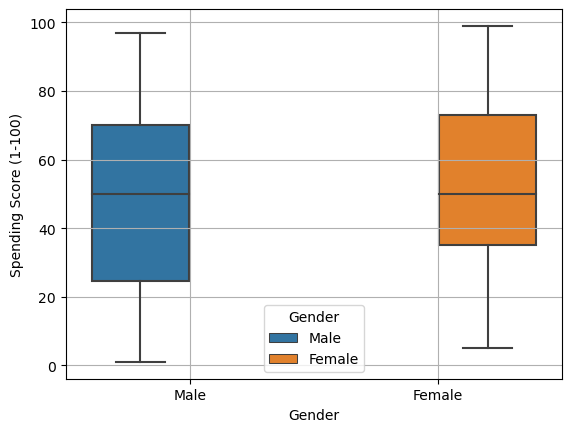

In [16]:
for i in df.columns:
    if i != 'Gender':
        sns.boxplot(x = df['Gender'], y = df[i], hue = df['Gender'])
        plt.grid(True)
        plt.show()
    else:
        continue

Age:
* Age of female customer lies between age 29(~30)-50, while for Male customer age lies slightly below 30 (approx 27/28) - 50.
* Median age of male customers is slightly greater than median age of female customers.

Annual Income:
* For females the annual income ranges from 40K to slightly below 80K. While for men the anual income ranges from above 40K to slightly below 80K.
* Median annual income of mail customer is slightly higher than median income of female customers. Median annual income of both Male and Female customer is around 60K.
* There is presence of outlier in case of Males while for females it is more balanced.

Spending Score (1-100):
* Starting point of spending score of males is lower than females i.e for males is in range between (20-30) while for females  it is slightly less than 40 approx between (30-40).
* Median spenidng score for both male and female is same.

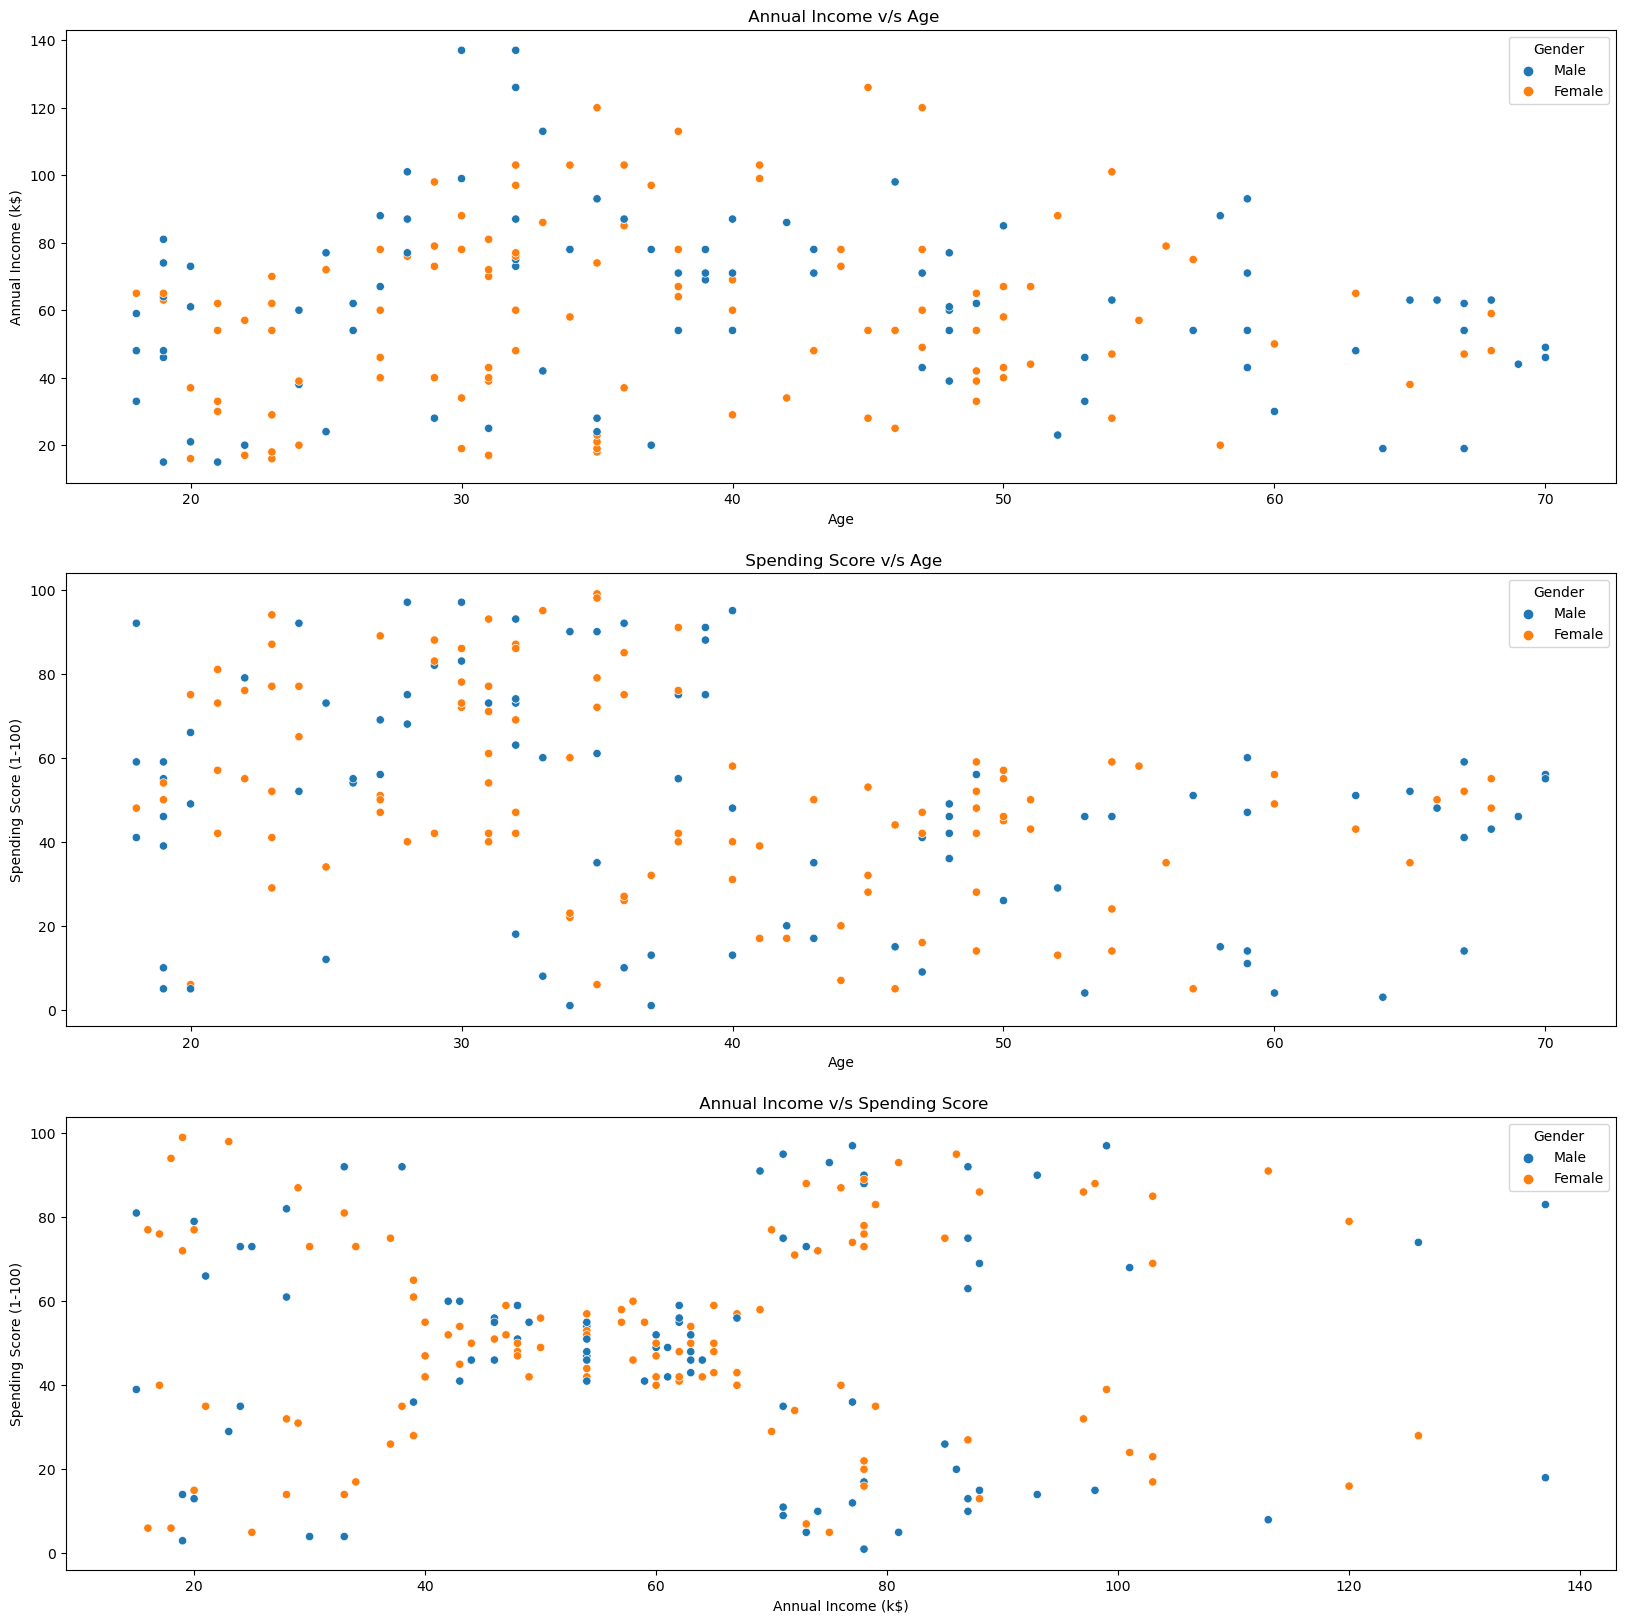

In [17]:
plt.figure(figsize = (20, 20))
plt.subplot(3,1,1)
sns.scatterplot(x = "Age", y = 'Annual Income (k$)', data = df, hue = df['Gender'])
plt.title(" Annual Income v/s Age")

plt.subplot(3,1,2)
sns.scatterplot(x = "Age", y = 'Spending Score (1-100)', data = df, hue = df['Gender'])
plt.title(" Spending Score v/s Age")

plt.subplot(3,1,3)
sns.scatterplot(x = "Annual Income (k$)", y = 'Spending Score (1-100)', data = df, hue = df['Gender'])
plt.title(" Annual Income v/s Spending Score")

plt.show()

Age v/s Annual Income:
* No matter the age, the dataset shows spread of annual income across different ages. Also, gender does not seem to play a significant role.

Age v/s Spending Score:
* For customer between age 20-30 we can see higher spending scores.
* For age in between 30-40 there is mix of customers having higher and lower spending scores.
* For people of higher age 40-70 tend to have an average spending score (~below 60). There is no much higher spending score between this age bracket.

Spending Score v/s Annual Income:
* People Having annual income in range of 0-40K have spending score either in range 0-40 or in the range 60-100
* For people having income in range 40K-70K have  spending scores in range of 40-60.
* For people having annual income in range of 70K-140K, we can again observe that the spending socre is either in range of 0-40 or in range 60-100.

In [18]:
df_new = df.copy()
df_new['Gender'] = df_new['Gender'].replace(['Male', 'Female'],[1, 0])

In [19]:
df_new.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


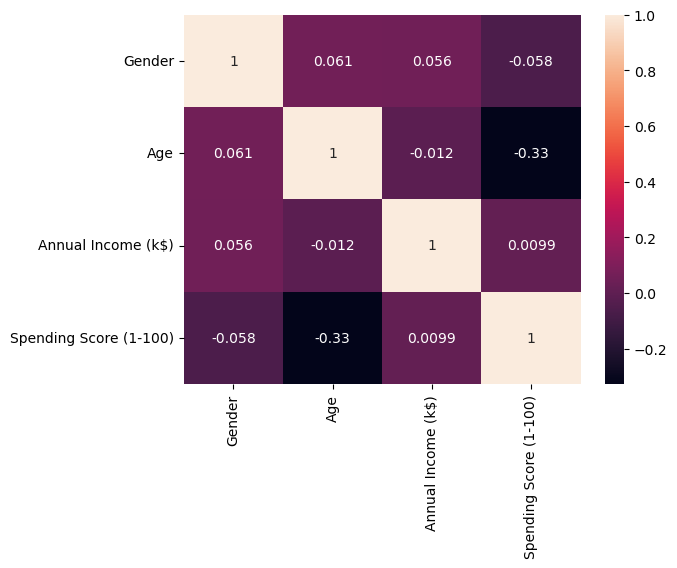

In [20]:
sns.heatmap(df_new.corr(), annot=True)
plt.show()

Below are the inferences from the above heatmap chart:
* Spending Score has negative correlation with Age.

# KMeans Clustering

In [21]:
from sklearn.cluster import KMeans

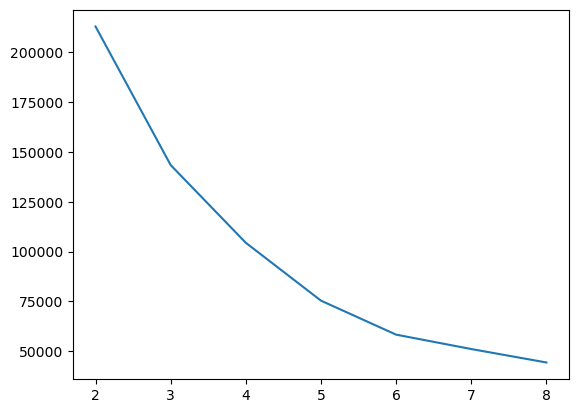

In [22]:
cluster = list(range(2,9))
result = [] #WCSS: Within- Cluster Sum of Squares
for num_cluster in cluster:
    model_clus = KMeans(n_clusters = num_cluster, max_iter = 150, random_state = 0)
    model_clus.fit(df_new)
    result.append(model_clus.inertia_)
    
plt.plot(cluster, result)

In [23]:
cluster = KMeans(n_clusters=5, max_iter=150, random_state= 15)
cluster.fit(df_new)

KMeans(max_iter=150, n_clusters=5, random_state=15)

In [24]:
cluster.labels_

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 4, 1, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4])

In [25]:
df_new['ClusterID'] = cluster.labels_
df_new.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),ClusterID
0,1,19,15,39,2
1,1,21,15,81,0
2,0,20,16,6,2
3,0,23,16,77,0
4,0,31,17,40,2


In [26]:
df_new['ClusterID'].value_counts()

1    79
4    39
3    36
2    23
0    23
Name: ClusterID, dtype: int64

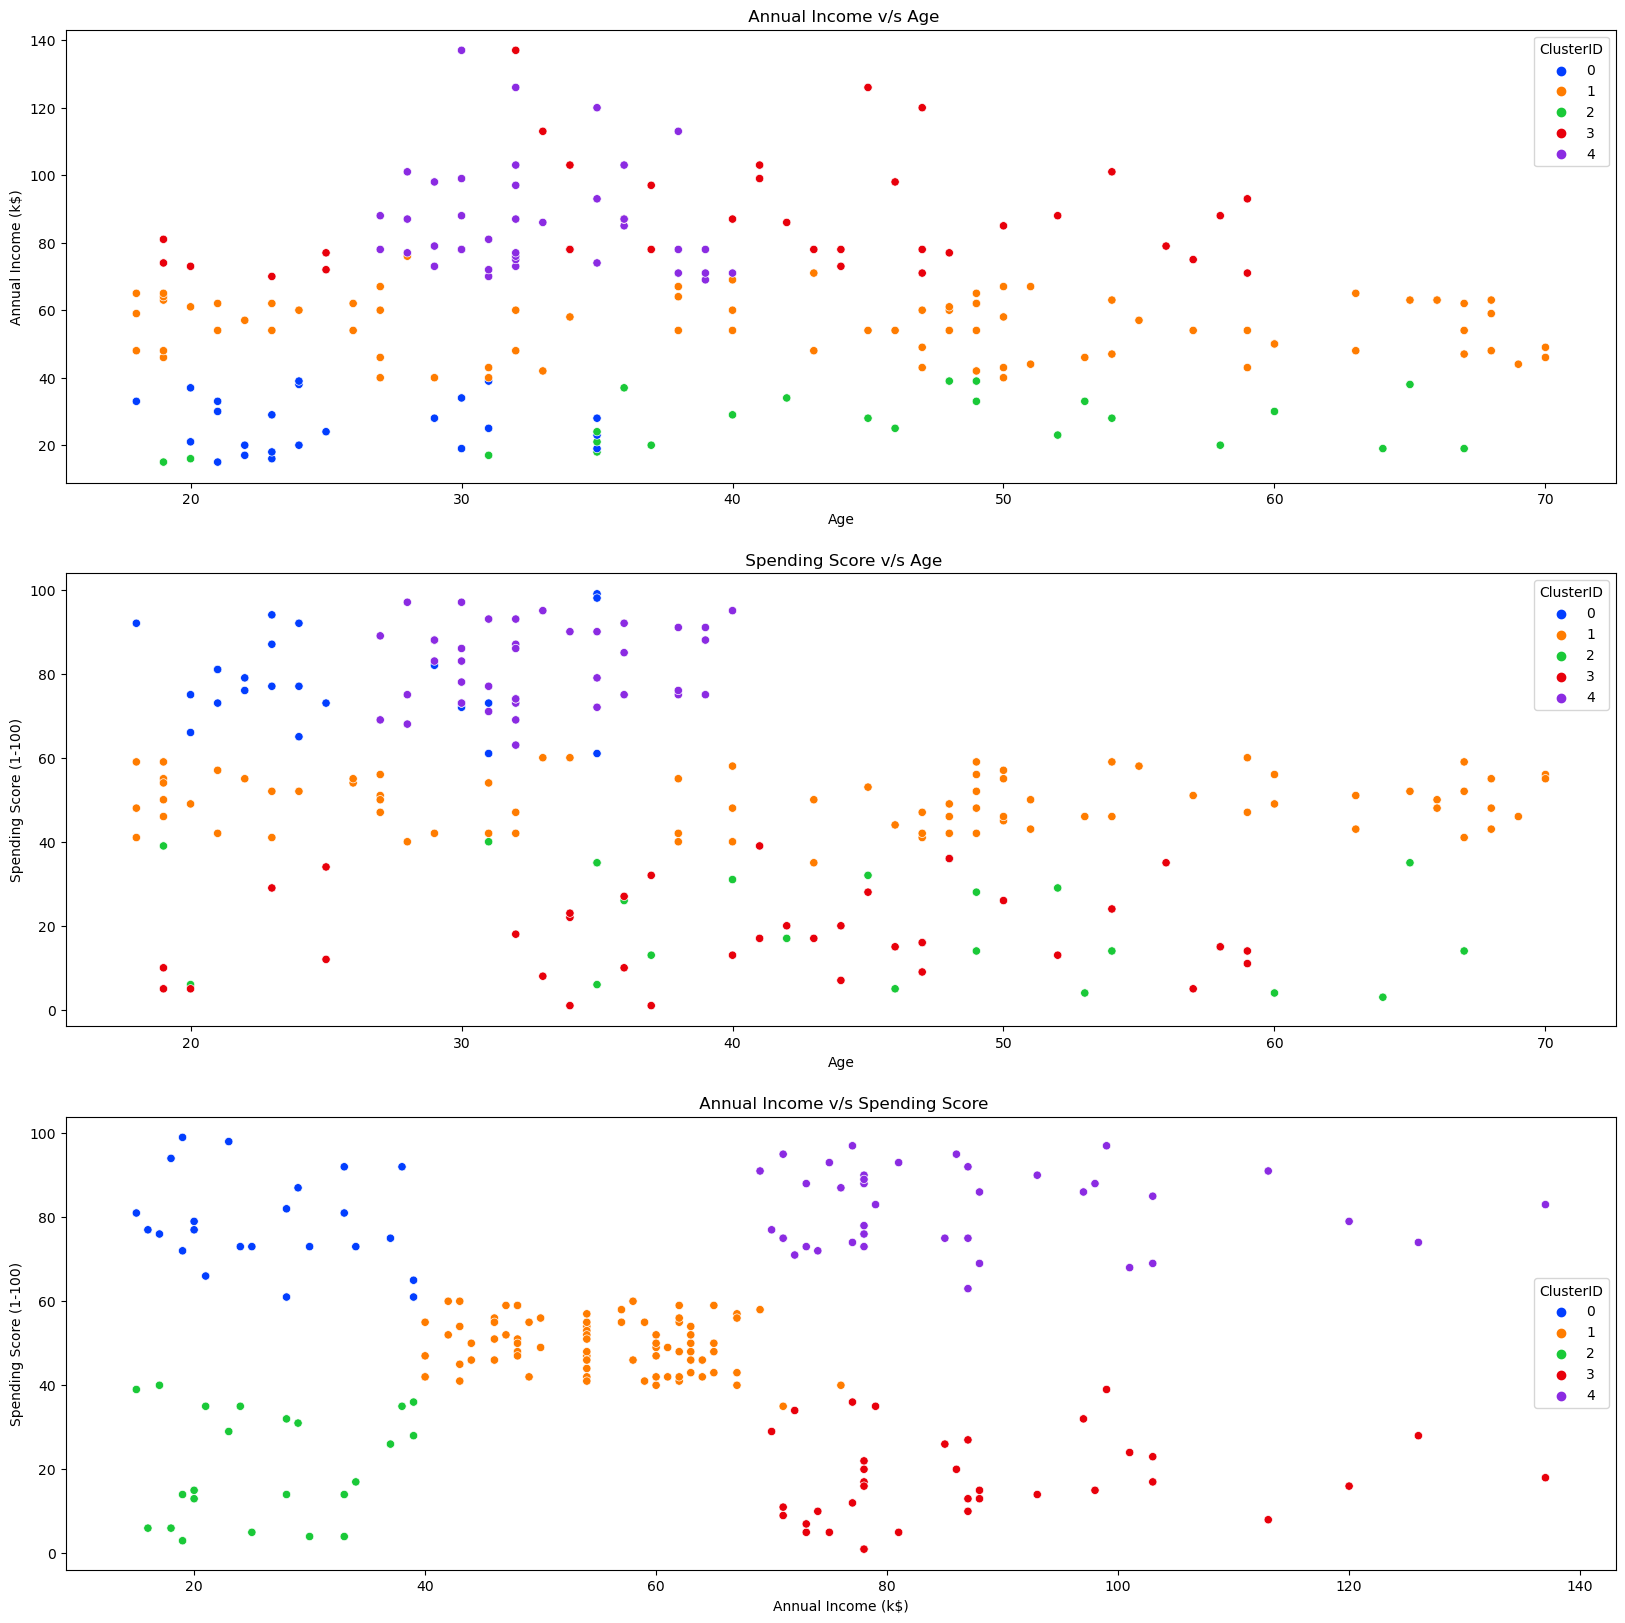

In [27]:
plt.figure(figsize = (20, 20))
plt.subplot(3,1,1)
sns.scatterplot(x = "Age", y = 'Annual Income (k$)', data = df_new, hue = df_new['ClusterID'], palette = "bright")
plt.title(" Annual Income v/s Age")

plt.subplot(3,1,2)
sns.scatterplot(x = "Age", y = 'Spending Score (1-100)', data = df_new, hue = df_new['ClusterID'], palette = "bright")
plt.title(" Spending Score v/s Age")

plt.subplot(3,1,3)
sns.scatterplot(x = "Annual Income (k$)", y = 'Spending Score (1-100)', data = df_new, hue = df_new['ClusterID'], palette = "bright")
plt.title(" Annual Income v/s Spending Score")
plt.show()

## Data is ready for classification model

In [29]:
# Creating training and testing set
from sklearn.model_selection import train_test_split

x = df_new.iloc[:,:-1]
y = df_new.iloc[:,-1]

#Standardizing the data:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [30]:
print(x_train)
print(x_test)

[[ 1.12815215  0.010765    0.39848884  0.96277471]
 [-0.88640526  0.58489852 -0.02137488 -0.12422899]
 [-0.88640526 -0.49160182  1.390894    1.38981187]
 [-0.88640526 -0.27630176 -1.43364376  1.8556706 ]
 [-0.88640526 -0.06100169  0.66567484  1.00159627]
 [ 1.12815215  0.65666521 -0.02137488 -0.04658587]
 [-0.88640526  0.80019859 -0.67025518 -0.20187212]
 [-0.88640526 -0.56336851  0.78018313  1.6615628 ]
 [ 1.12815215 -0.41983513 -0.70842461  0.38045129]
 [-0.88640526  1.15903204 -0.13588317  0.30280817]
 [-0.88640526 -0.27630176  0.51299713  0.84631002]
 [-0.88640526  2.091999   -0.05954431  0.18634349]
 [ 1.12815215 -0.49160182  0.4748277   0.88513158]
 [-0.88640526  0.7284319   0.05496398 -0.08540743]
 [ 1.12815215 -0.99396865  0.62750542 -1.48298362]
 [-0.88640526  0.80019859 -0.09771374 -0.16305055]
 [ 1.12815215  1.94846562  0.09313341 -0.08540743]
 [ 1.12815215 -0.13276838 -1.54815205 -1.44416206]
 [ 1.12815215 -0.27630176 -1.24279661  0.41927286]
 [ 1.12815215 -0.49160182  0.55

## Logistic Regression:

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
pred = pd.DataFrame({'y_test' : y_test, 'y_pred' : y_pred})
pred.head(10)

,y_test,y_pred
18,2,2
170,3,3
107,1,1
98,1,1
177,4,4
182,3,3
5,0,0
146,3,1
12,2,2
152,3,3


In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification_report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[ 5  0  0  0  0]
 [ 0 19  0  0  0]
 [ 0  2  9  0  0]
 [ 0  3  0 10  0]
 [ 0  0  0  0 12]]
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.79      1.00      0.88        19
           2       1.00      0.82      0.90        11
           3       1.00      0.77      0.87        13
           4       1.00      1.00      1.00        12

    accuracy                           0.92        60
   macro avg       0.96      0.92      0.93        60
weighted avg       0.93      0.92      0.92        60

Accuracy Score: 0.9166666666666666


# Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
pred = pd.DataFrame({'y_test' : y_test, 'y_pred' : y_pred})
pred.head(10)

,y_test,y_pred
18,2,2
170,3,3
107,1,1
98,1,1
177,4,4
182,3,3
5,0,0
146,3,3
12,2,2
152,3,3


In [34]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification_report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[ 5  0  0  0  0]
 [ 0 19  0  0  0]
 [ 0  1 10  0  0]
 [ 0  0  0 13  0]
 [ 0  0  0  0 12]]
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.95      1.00      0.97        19
           2       1.00      0.91      0.95        11
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        12

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.99        60
weighted avg       0.98      0.98      0.98        60

Accuracy Score: 0.9833333333333333


# Gradient Boosting Classifier

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators = 100, random_state = 50)
gbc.fit(x_train, y_train)
pred = pd.DataFrame({'y_test' : y_test, 'y_pred' : y_pred})
pred.head(10)

,y_test,y_pred
18,2,2
170,3,3
107,1,1
98,1,1
177,4,4
182,3,3
5,0,0
146,3,3
12,2,2
152,3,3


In [36]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification_report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[ 5  0  0  0  0]
 [ 0 19  0  0  0]
 [ 0  1 10  0  0]
 [ 0  0  0 13  0]
 [ 0  0  0  0 12]]
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.95      1.00      0.97        19
           2       1.00      0.91      0.95        11
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        12

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.99        60
weighted avg       0.98      0.98      0.98        60

Accuracy Score: 0.9833333333333333


# Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
pred = pd.DataFrame({'y_test' : y_test, 'y_pred' : y_pred})
pred.head(10)

,y_test,y_pred
18,2,2
170,3,3
107,1,1
98,1,1
177,4,4
182,3,3
5,0,0
146,3,3
12,2,2
152,3,3


In [44]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification_report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[ 5  0  0  0  0]
 [ 0 19  0  0  0]
 [ 0  0 11  0  0]
 [ 0  0  0 13  0]
 [ 0  0  0  0 12]]
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        12

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Accuracy Score: 1.0


### Looking at the Accuracy Score of Logistic Regression, Decision Tree, Gradient Boosting  and Random Forest we can conclude that Random Froest Model provides 100% accuracy.